<a href="https://colab.research.google.com/github/Forpee/time-series-practice-0/blob/main/Time_Series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import datetime

import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import tensorflow as tf

mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False

In [ ]:
zip_path = tf.keras.utils.get_file(
   origin='https://storage.googleapis.com/tensorflow/tf-keras-datasets/jena_climate_2009_2016.csv.zip',
   fname='jena_climate_2009_2016.csv.zip',
   extract= True
)

csv_path, _ = os.path.splitext(zip_path)

In [3]:
import pandas as pd
df = pd.read_csv(csv_path)

In [4]:
df.tail()

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
420546,31.12.2016 23:20:00,1000.07,-4.05,269.10,-8.13,73.10,4.52,3.30,1.22,2.06,3.30,1292.98,0.67,1.52,240.0
420547,31.12.2016 23:30:00,999.93,-3.35,269.81,-8.06,69.71,4.77,3.32,1.44,2.07,3.32,1289.44,1.14,1.92,234.3
420548,31.12.2016 23:40:00,999.82,-3.16,270.01,-8.21,67.91,4.84,3.28,1.55,2.05,3.28,1288.39,1.08,2.00,215.2
420549,31.12.2016 23:50:00,999.81,-4.23,268.94,-8.53,71.80,4.46,3.20,1.26,1.99,3.20,1293.56,1.49,2.16,225.8
420550,01.01.2017 00:00:00,999.82,-4.82,268.36,-8.42,75.70,4.27,3.23,1.04,2.01,3.23,1296.38,1.23,1.96,184.9


In [5]:
# Slice [start:stop:step], starting from index 5 take every 6th record.
df = df[5::6]

In [6]:
date_time = pd.to_datetime(df.pop('Date Time'), format='%d.%m.%Y %H:%M:%S')

In [7]:
df.head()

,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
5,996.50,-8.05,265.38,-8.78,94.4,3.33,3.14,0.19,1.96,3.15,1307.86,0.21,0.63,192.7
11,996.62,-8.88,264.54,-9.77,93.2,3.12,2.90,0.21,1.81,2.91,1312.25,0.25,0.63,190.3
17,996.84,-8.81,264.59,-9.66,93.5,3.13,2.93,0.20,1.83,2.94,1312.18,0.18,0.63,167.2
23,996.99,-9.05,264.34,-10.02,92.6,3.07,2.85,0.23,1.78,2.85,1313.61,0.10,0.38,240.0
29,997.46,-9.63,263.72,-10.65,92.2,2.94,2.71,0.23,1.69,2.71,1317.19,0.40,0.88,157.0


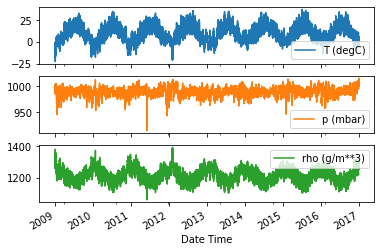

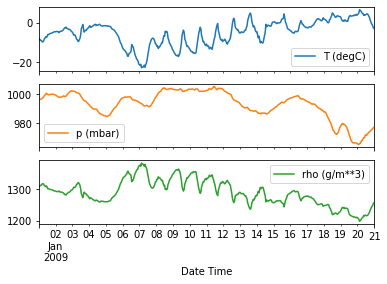

In [8]:
plot_cols = ['T (degC)', 'p (mbar)', 'rho (g/m**3)']
plot_features = df[plot_cols]
plot_features.index = date_time
_ = plot_features.plot(subplots=True)

plot_features = df[plot_cols][:480]
plot_features.index = date_time[:480]
_ = plot_features.plot(subplots=True)

In [9]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
p (mbar),70091.0,989.212842,8.358886,913.60,984.20,989.57,994.720,1015.29
T (degC),70091.0,9.450482,8.423384,-22.76,3.35,9.41,15.480,37.28
Tpot (K),70091.0,283.493086,8.504424,250.85,277.44,283.46,289.530,311.21
Tdew (degC),70091.0,4.956471,6.730081,-24.80,0.24,5.21,10.080,23.06
rh (%),70091.0,76.009788,16.474920,13.88,65.21,79.30,89.400,100.00
VPmax (mbar),70091.0,13.576576,7.739883,0.97,7.77,11.82,17.610,63.77
VPact (mbar),70091.0,9.533968,4.183658,0.81,6.22,8.86,12.360,28.25
VPdef (mbar),70091.0,4.042536,4.898549,0.00,0.87,2.19,5.300,46.01
sh (g/kg),70091.0,6.022560,2.655812,0.51,3.92,5.59,7.800,18.07
H2OC (mmol/mol),70091.0,9.640437,4.234862,0.81,6.29,8.96,12.490,28.74


In [10]:
wv = df['wv (m/s)']
wv

5         0.21
11        0.25
17        0.18
23        0.10
29        0.40
          ... 
420521    0.87
420527    1.02
420533    0.71
420539    0.35
420545    0.56
Name: wv (m/s), Length: 70091, dtype: float64

In [11]:
bad_wv = wv == -9999.0
bad_wv

5         False
11        False
17        False
23        False
29        False
          ...  
420521    False
420527    False
420533    False
420539    False
420545    False
Name: wv (m/s), Length: 70091, dtype: bool

In [12]:
wv[bad_wv]

343583   -9999.0
343589   -9999.0
343595   -9999.0
Name: wv (m/s), dtype: float64

In [13]:
wv[bad_wv] = 0.0

max_wv = df['max. wv (m/s)']
bad_max_wv = max_wv == -9999.0
max_wv[bad_max_wv] = 0.0

# The above inplace edits are reflected in the DataFrame.
df['wv (m/s)'].min()

0.0

Text(0, 0.5, 'Wind Velocity [m/s]')

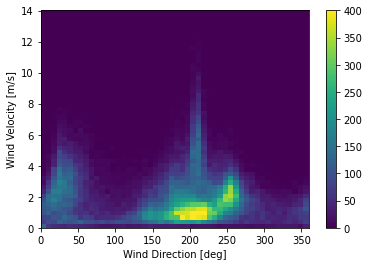

In [14]:
plt.hist2d(df['wd (deg)'], df['wv (m/s)'], bins=(50, 50), vmax=400)
plt.colorbar()
plt.xlabel('Wind Direction [deg]')
plt.ylabel('Wind Velocity [m/s]')

In [15]:
wv = df.pop('wv (m/s)')
max_wv = df.pop('max. wv (m/s)')

# Convert to radians.
wd_rad = df.pop('wd (deg)')*np.pi / 180

In [16]:
# Calculate the wind x and y components.
df['Wx'] = wv*np.cos(wd_rad)
df['Wy'] = wv*np.sin(wd_rad)

# Calculate the max wind x and y components.
df['max Wx'] = max_wv*np.cos(wd_rad)
df['max Wy'] = max_wv*np.sin(wd_rad)

(-11.305513973134667, 8.24469928549079, -8.27438540335515, 7.7338312955467785)

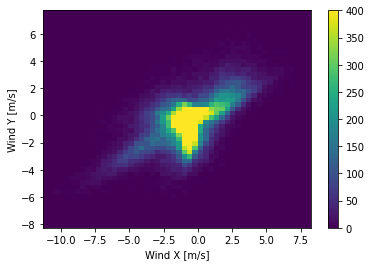

In [17]:
plt.hist2d(df['Wx'], df['Wy'], bins=(50, 50), vmax=400)
plt.colorbar()
plt.xlabel('Wind X [m/s]')
plt.ylabel('Wind Y [m/s]')
ax = plt.gca()
ax.axis('tight')

In [18]:
timestamp_s = date_time.map(pd.Timestamp.timestamp)
timestamp_s

5         1.230772e+09
11        1.230775e+09
17        1.230779e+09
23        1.230782e+09
29        1.230786e+09
              ...     
420521    1.483211e+09
420527    1.483215e+09
420533    1.483219e+09
420539    1.483222e+09
420545    1.483226e+09
Name: Date Time, Length: 70091, dtype: float64

In [19]:
day = 24*60*60
year = (365.2425)*day

df['Day sin'] = np.sin(timestamp_s * (2 * np.pi / day))
df['Day cos'] = np.cos(timestamp_s * (2 * np.pi / day))
df['Year sin'] = np.sin(timestamp_s * (2 * np.pi / year))
df['Year cos'] = np.cos(timestamp_s * (2 * np.pi / year))

Text(0.5, 1.0, 'Time of day signal')

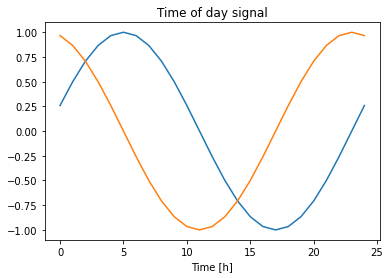

In [20]:
plt.plot(np.array(df['Day sin'])[:25])
plt.plot(np.array(df['Day cos'])[:25])
plt.xlabel('Time [h]')
plt.title('Time of day signal')

In [21]:
fft = tf.signal.rfft(df['T (degC)'])

In [22]:
fft

<tf.Tensor: shape=(35046,), dtype=complex64, numpy=
array([ 6.6239369e+05+0.0000000e+00j, -4.6668301e+03+3.7410137e+04j,
       -2.7058481e+03+1.2410741e+04j, ..., -2.9588844e+01+2.2237257e+01j,
        2.2038260e+01-3.7979336e+01j,  6.8314796e+01+2.2538645e+01j],
      dtype=complex64)>

In [23]:
f_per_dataset = np.arange(0, len(fft))

In [24]:
f_per_dataset

array([    0,     1,     2, ..., 35043, 35044, 35045])

In [25]:
n_samples_h = len(df['T (degC)'])

In [26]:
n_samples_h

70091

In [27]:
hours_per_year = 24*365.2524
years_per_dataset = n_samples_h/(hours_per_year)
years_per_dataset

7.995726608047841

In [28]:
f_per_year = f_per_dataset/years_per_dataset
f_per_year

array([0.00000000e+00, 1.25066807e-01, 2.50133615e-01, ...,
       4.38271613e+03, 4.38284120e+03, 4.38296627e+03])

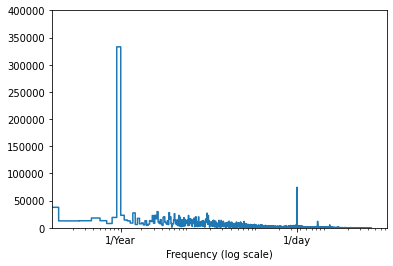

In [29]:
plt.step(f_per_year, np.abs(fft))
plt.xscale('log')
plt.ylim(0, 400000)
plt.xlim([0.1, max(plt.xlim())])
plt.xticks([1, 365.2524], labels=['1/Year', '1/day'])
_ = plt.xlabel('Frequency (log scale)')

In [30]:
column_indices = {name: i for i, name in enumerate(df.columns)}
column_indices

{'Day cos': 16,
 'Day sin': 15,
 'H2OC (mmol/mol)': 9,
 'T (degC)': 1,
 'Tdew (degC)': 3,
 'Tpot (K)': 2,
 'VPact (mbar)': 6,
 'VPdef (mbar)': 7,
 'VPmax (mbar)': 5,
 'Wx': 11,
 'Wy': 12,
 'Year cos': 18,
 'Year sin': 17,
 'max Wx': 13,
 'max Wy': 14,
 'p (mbar)': 0,
 'rh (%)': 4,
 'rho (g/m**3)': 10,
 'sh (g/kg)': 8}

#Create train, test and val splits


In [31]:
n = len(df)
train_df = df[0:int(n*0.7)]
val_df = df[int(n*0.7):int(n*0.9)]
test_df = df[int(n*0.9):]

num_features = df.shape[1]

#Normalize


In [32]:
train_mean = train_df.mean()
train_std = train_df.std()

train_df = (train_df - train_mean) / train_std
train_df

,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),Wx,Wy,max Wx,max Wy,Day sin,Day cos,Year sin,Year cos
5,0.945308,-1.982473,-2.041888,-1.918973,1.117102,-1.302851,-1.477323,-0.790424,-1.480036,-1.482697,2.218524,0.193409,0.221161,0.111140,0.217928,0.366111,1.366069,-0.061052,1.428434
11,0.959770,-2.078372,-2.138166,-2.060964,1.044617,-1.330143,-1.534354,-0.786272,-1.536190,-1.539035,2.325708,0.172987,0.222101,0.109458,0.227798,0.707200,1.224794,-0.060029,1.428424
17,0.986284,-2.070284,-2.132435,-2.045187,1.062738,-1.328843,-1.527225,-0.788348,-1.528703,-1.531992,2.323998,0.207983,0.276266,0.111218,0.324078,1.000100,1.000059,-0.059006,1.428412
23,1.004362,-2.098014,-2.161090,-2.096820,1.008375,-1.336641,-1.546235,-0.782121,-1.547420,-1.553119,2.358913,0.270343,0.195267,0.246907,0.145176,1.224850,0.707179,-0.057983,1.428400
29,1.061006,-2.165028,-2.232152,-2.187178,0.984214,-1.353535,-1.579503,-0.782121,-1.581113,-1.585982,2.446320,0.112264,0.350818,0.048640,0.402053,1.366133,0.366112,-0.056960,1.428388
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294353,0.169167,0.904892,0.886564,1.571997,0.947972,0.776492,1.984916,-0.493604,1.979016,1.977352,-0.882480,-0.166720,-1.508412,-0.155728,-1.363530,-0.955374,1.042725,-0.855026,-1.154613
294359,0.266787,0.879473,0.853325,1.405624,0.621793,0.742703,1.680752,-0.283962,1.672043,1.672192,-0.822662,-0.824901,-0.641039,-0.704391,-0.475387,-0.652949,1.254471,-0.855883,-1.154062
294365,0.217374,0.740824,0.719224,1.425703,1.086900,0.559461,1.716396,-0.605690,1.709479,1.707403,-0.716211,-0.030746,0.645277,0.013960,0.600050,-0.306022,1.380734,-0.856739,-1.153511
294371,0.213759,0.710783,0.689423,1.412795,1.147303,0.521772,1.692633,-0.645127,1.687018,1.683929,-0.689842,0.014300,-0.102616,-0.095117,-0.198426,0.061765,1.412909,-0.857595,-1.152959


In [33]:
val_df = (val_df - train_mean) / train_std
test_df = (test_df - train_mean) / train_std

#Plot

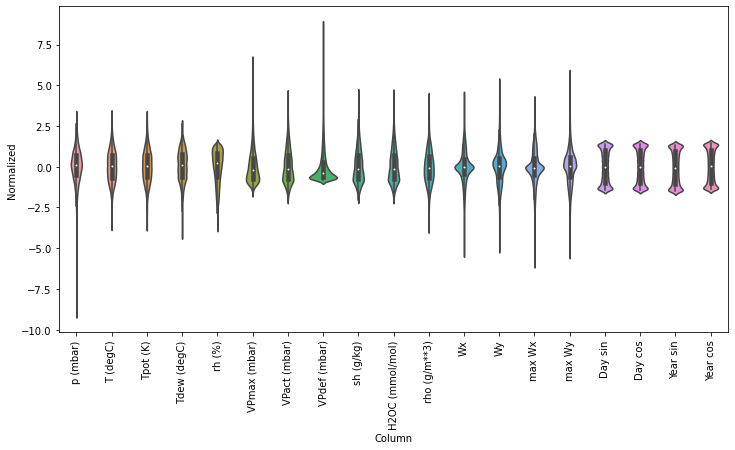

In [34]:
df_std = (df - train_mean) / train_std
df_std = df_std.melt(var_name='Column', value_name='Normalized')
plt.figure(figsize=(12, 6))
ax = sns.violinplot(x='Column', y='Normalized', data=df_std)
_ = ax.set_xticklabels(df.keys(), rotation=90)

#Window dataset my own way

In [35]:
df


,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),Wx,Wy,max Wx,max Wy,Day sin,Day cos,Year sin,Year cos
5,996.50,-8.05,265.38,-8.78,94.40,3.33,3.14,0.19,1.96,3.15,1307.86,-0.204862,-0.046168,-0.614587,-0.138503,0.258819,0.965926,0.010049,0.999950
11,996.62,-8.88,264.54,-9.77,93.20,3.12,2.90,0.21,1.81,2.91,1312.25,-0.245971,-0.044701,-0.619848,-0.112645,0.500000,0.866025,0.010766,0.999942
17,996.84,-8.81,264.59,-9.66,93.50,3.13,2.93,0.20,1.83,2.94,1312.18,-0.175527,0.039879,-0.614344,0.139576,0.707107,0.707107,0.011483,0.999934
23,996.99,-9.05,264.34,-10.02,92.60,3.07,2.85,0.23,1.78,2.85,1313.61,-0.050000,-0.086603,-0.190000,-0.329090,0.866025,0.500000,0.012199,0.999926
29,997.46,-9.63,263.72,-10.65,92.20,2.94,2.71,0.23,1.69,2.71,1317.19,-0.368202,0.156292,-0.810044,0.343843,0.965926,0.258819,0.012916,0.999917
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420521,1002.18,-0.98,272.01,-5.36,72.00,5.69,4.09,1.59,2.54,4.08,1280.70,-0.855154,-0.160038,-1.336792,-0.250174,-0.953717,0.300706,0.006900,0.999976
420527,1001.40,-1.40,271.66,-6.84,66.29,5.51,3.65,1.86,2.27,3.65,1281.87,-0.716196,-0.726267,-1.348134,-1.367090,-0.843391,0.537300,0.007617,0.999971
420533,1001.19,-2.75,270.32,-6.90,72.90,4.99,3.64,1.35,2.26,3.63,1288.02,-0.661501,0.257908,-1.453438,0.566672,-0.675590,0.737277,0.008334,0.999965
420539,1000.65,-2.89,270.22,-7.15,72.30,4.93,3.57,1.37,2.22,3.57,1288.03,-0.280621,-0.209169,-0.545207,-0.406385,-0.461749,0.887011,0.009050,0.999959


In [36]:
df_std

,Column,Normalized
0,p (mbar),0.945308
1,p (mbar),0.959770
2,p (mbar),0.986284
3,p (mbar),1.004362
4,p (mbar),1.061006
...,...,...
1331724,Year cos,1.428472
1331725,Year cos,1.428464
1331726,Year cos,1.428456
1331727,Year cos,1.428447


In [37]:
df


,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),Wx,Wy,max Wx,max Wy,Day sin,Day cos,Year sin,Year cos
5,996.50,-8.05,265.38,-8.78,94.40,3.33,3.14,0.19,1.96,3.15,1307.86,-0.204862,-0.046168,-0.614587,-0.138503,0.258819,0.965926,0.010049,0.999950
11,996.62,-8.88,264.54,-9.77,93.20,3.12,2.90,0.21,1.81,2.91,1312.25,-0.245971,-0.044701,-0.619848,-0.112645,0.500000,0.866025,0.010766,0.999942
17,996.84,-8.81,264.59,-9.66,93.50,3.13,2.93,0.20,1.83,2.94,1312.18,-0.175527,0.039879,-0.614344,0.139576,0.707107,0.707107,0.011483,0.999934
23,996.99,-9.05,264.34,-10.02,92.60,3.07,2.85,0.23,1.78,2.85,1313.61,-0.050000,-0.086603,-0.190000,-0.329090,0.866025,0.500000,0.012199,0.999926
29,997.46,-9.63,263.72,-10.65,92.20,2.94,2.71,0.23,1.69,2.71,1317.19,-0.368202,0.156292,-0.810044,0.343843,0.965926,0.258819,0.012916,0.999917
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420521,1002.18,-0.98,272.01,-5.36,72.00,5.69,4.09,1.59,2.54,4.08,1280.70,-0.855154,-0.160038,-1.336792,-0.250174,-0.953717,0.300706,0.006900,0.999976
420527,1001.40,-1.40,271.66,-6.84,66.29,5.51,3.65,1.86,2.27,3.65,1281.87,-0.716196,-0.726267,-1.348134,-1.367090,-0.843391,0.537300,0.007617,0.999971
420533,1001.19,-2.75,270.32,-6.90,72.90,4.99,3.64,1.35,2.26,3.63,1288.02,-0.661501,0.257908,-1.453438,0.566672,-0.675590,0.737277,0.008334,0.999965
420539,1000.65,-2.89,270.22,-7.15,72.30,4.93,3.57,1.37,2.22,3.57,1288.03,-0.280621,-0.209169,-0.545207,-0.406385,-0.461749,0.887011,0.009050,0.999959


In [38]:
df['T (degC)']

5        -8.05
11       -8.88
17       -8.81
23       -9.05
29       -9.63
          ... 
420521   -0.98
420527   -1.40
420533   -2.75
420539   -2.89
420545   -3.93
Name: T (degC), Length: 70091, dtype: float64

In [39]:
#create a function to label windowed data
def get_labelled_windows(window_data, horizon=1):
  '''
  creates labels for windowed dataset

  E.g. if horizon = 1 (default)
  Input: [0, 1, 2, 3, 4, 5, 6] -> Output: ([1, 2, 3, 4, 5], [6])
  '''
  return window_data[:, :-horizon], window_data[:, -horizon:]
  

In [40]:
t=[0, 1, 2, 3, 4, 5, 6]
t[::-1]

[6, 5, 4, 3, 2, 1, 0]

In [41]:
s=tf.expand_dims(t, axis=0)
s[:,:-1]
tf.squeeze(s).numpy()
s

<tf.Tensor: shape=(1, 7), dtype=int32, numpy=array([[0, 1, 2, 3, 4, 5, 6]], dtype=int32)>

In [42]:
test_window, test_label = get_labelled_windows(tf.expand_dims(t, axis=0))
print(f"Window: {tf.squeeze(test_window).numpy()} -> Label: {tf.squeeze(test_label).numpy()}")

Window: [0 1 2 3 4 5] -> Label: 6


In [43]:
temp_arr=df['T (degC)'].to_numpy()
temp_arr

array([-8.05, -8.88, -8.81, ..., -2.75, -2.89, -3.93])

#Use numpy indexing to create windowed **arrays**

In [44]:
def make_windows(data_arr, window_size=7, horizon=1):
  '''
  Turns a 1D array into a 2d array of sequential window arrays of window_size
  '''
   # 1. Create a window of specific window_size (add the horizon on the end for later labelling)
  window_step = np.expand_dims(np.arange(window_size+horizon), axis=0)
  # print(f"Window step:\n {window_step}")

  window_indexes= window_step + np.expand_dims(np.arange(len(data_arr)-(window_size+horizon-1)), axis=0).T
  # print(f"Window indexes:\n {window_indexes, window_indexes.shape}")

  windowed_array = data_arr[window_indexes]

  windows, labels = get_labelled_windows(windowed_array, horizon=horizon)
  
  return windows, labels




In [45]:
a = [0, 1, 2, 3, 4, 5, 6, 7] + np.expand_dims(np.arange(len(temp_arr)-(7+1-1)), axis=0).T
a, a.shape

(array([[    0,     1,     2, ...,     5,     6,     7],
        [    1,     2,     3, ...,     6,     7,     8],
        [    2,     3,     4, ...,     7,     8,     9],
        ...,
        [70081, 70082, 70083, ..., 70086, 70087, 70088],
        [70082, 70083, 70084, ..., 70087, 70088, 70089],
        [70083, 70084, 70085, ..., 70088, 70089, 70090]]), (70084, 8))

In [46]:
window_temp_test_0=temp_arr[a]
window_temp_test_0

array([[-8.05, -8.88, -8.81, ..., -9.67, -9.17, -8.1 ],
       [-8.88, -8.81, -9.05, ..., -9.17, -8.1 , -7.66],
       [-8.81, -9.05, -9.63, ..., -8.1 , -7.66, -7.04],
       ...,
       [ 4.15,  4.97,  2.44, ..., -0.98, -1.4 , -2.75],
       [ 4.97,  2.44,  1.29, ..., -1.4 , -2.75, -2.89],
       [ 2.44,  1.29, -0.42, ..., -2.75, -2.89, -3.93]])

In [47]:
train_df

,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),Wx,Wy,max Wx,max Wy,Day sin,Day cos,Year sin,Year cos
5,0.945308,-1.982473,-2.041888,-1.918973,1.117102,-1.302851,-1.477323,-0.790424,-1.480036,-1.482697,2.218524,0.193409,0.221161,0.111140,0.217928,0.366111,1.366069,-0.061052,1.428434
11,0.959770,-2.078372,-2.138166,-2.060964,1.044617,-1.330143,-1.534354,-0.786272,-1.536190,-1.539035,2.325708,0.172987,0.222101,0.109458,0.227798,0.707200,1.224794,-0.060029,1.428424
17,0.986284,-2.070284,-2.132435,-2.045187,1.062738,-1.328843,-1.527225,-0.788348,-1.528703,-1.531992,2.323998,0.207983,0.276266,0.111218,0.324078,1.000100,1.000059,-0.059006,1.428412
23,1.004362,-2.098014,-2.161090,-2.096820,1.008375,-1.336641,-1.546235,-0.782121,-1.547420,-1.553119,2.358913,0.270343,0.195267,0.246907,0.145176,1.224850,0.707179,-0.057983,1.428400
29,1.061006,-2.165028,-2.232152,-2.187178,0.984214,-1.353535,-1.579503,-0.782121,-1.581113,-1.585982,2.446320,0.112264,0.350818,0.048640,0.402053,1.366133,0.366112,-0.056960,1.428388
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294353,0.169167,0.904892,0.886564,1.571997,0.947972,0.776492,1.984916,-0.493604,1.979016,1.977352,-0.882480,-0.166720,-1.508412,-0.155728,-1.363530,-0.955374,1.042725,-0.855026,-1.154613
294359,0.266787,0.879473,0.853325,1.405624,0.621793,0.742703,1.680752,-0.283962,1.672043,1.672192,-0.822662,-0.824901,-0.641039,-0.704391,-0.475387,-0.652949,1.254471,-0.855883,-1.154062
294365,0.217374,0.740824,0.719224,1.425703,1.086900,0.559461,1.716396,-0.605690,1.709479,1.707403,-0.716211,-0.030746,0.645277,0.013960,0.600050,-0.306022,1.380734,-0.856739,-1.153511
294371,0.213759,0.710783,0.689423,1.412795,1.147303,0.521772,1.692633,-0.645127,1.687018,1.683929,-0.689842,0.014300,-0.102616,-0.095117,-0.198426,0.061765,1.412909,-0.857595,-1.152959


In [48]:
temp_train_arr = train_df['T (degC)'].to_numpy()
temp_train_arr

array([-1.98247323, -2.07837211, -2.07028426, ...,  0.74082386,
        0.71078325,  0.65301284])

In [49]:
temp_train_arr.size

49063

In [50]:
train_windows, train_labels = make_windows(temp_train_arr, window_size=3, horizon=1)
len(train_windows), len(train_labels)

(49060, 49060)

In [51]:
# View the first 3 windows/labels
for i in range(3):
  print(f"Window: {train_windows[i]} -> Label: {train_labels[i]}")

Window: [-1.98247323 -2.07837211 -2.07028426] -> Label: [-2.09801405]
Window: [-2.07837211 -2.07028426 -2.09801405] -> Label: [-2.16502773]
Window: [-2.07028426 -2.09801405 -2.16502773] -> Label: [-2.16964936]


In [52]:
# View the last 3 windows/labels
for i in range(3):
  print(f"Window: {train_windows[i-3]} -> Label: {train_labels[i-3]}")

Window: [0.93724325 0.90489182 0.87947284] -> Label: [0.74082386]
Window: [0.90489182 0.87947284 0.74082386] -> Label: [0.71078325]
Window: [0.87947284 0.74082386 0.71078325] -> Label: [0.65301284]


In [53]:
HORIZON=1

#Expiriment with timeseries_dataset_from_array()

In [54]:
from tensorflow.keras import layers

model_0= tf.keras.Sequential([
  layers.Dense(32, activation='relu'),
  layers.Dense(32, activation='relu'),
  layers.Dense(HORIZON)
])

model_0.compile(loss='mae',
                optimizer=tf.optimizers.Adam(),
                metrics=['mae'])



#Create windowed val set

In [55]:
val_df

,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),Wx,Wy,max Wx,max Wy,Day sin,Day cos,Year sin,Year cos
294383,0.213759,0.618351,0.597730,1.321003,1.207707,0.407409,1.535799,-0.688716,1.526045,1.526654,-0.601703,0.072253,-0.639008,0.089478,-0.535618,0.759951,1.192787,-0.859306,-1.151853
294389,0.241478,0.545560,0.523229,1.260764,1.286231,0.321636,1.433619,-0.738532,1.424968,1.423369,-0.526259,0.071987,-0.233849,0.079109,-0.188724,1.042768,0.955490,-0.860161,-1.151299
294395,0.258351,0.510898,0.487698,1.249290,1.370796,0.282648,1.414609,-0.784197,1.406250,1.404590,-0.490612,-0.459268,0.629912,-0.526513,0.659056,1.254528,0.653085,-0.861015,-1.150745
294401,0.277634,0.487789,0.463629,1.227776,1.388917,0.256656,1.378964,-0.794575,1.368815,1.367032,-0.463755,-0.086355,-0.297434,-0.068182,-0.229261,1.380799,0.306181,-0.861869,-1.150190
294407,0.294506,0.502810,0.476236,1.255027,1.413079,0.273551,1.424114,-0.807029,1.413738,1.413979,-0.474987,-0.421783,0.109299,-0.413007,0.139150,1.412977,-0.061582,-0.862723,-1.149635
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378461,1.447871,-0.708058,-0.814346,-0.543525,0.585551,-0.751825,-0.683646,-0.603614,-0.701375,-0.701017,1.032666,1.972660,1.474668,1.879942,1.333168,-0.999946,-0.999854,1.261156,0.516062
378467,1.447871,-0.713835,-0.821223,-0.496195,0.730519,-0.755724,-0.645625,-0.643052,-0.667683,-0.665806,1.037061,1.683218,1.168334,1.824204,1.199236,-1.224696,-0.706974,1.261515,0.515119
378473,1.476795,-0.787781,-0.895723,-0.513406,0.929851,-0.798610,-0.659883,-0.699095,-0.678914,-0.679891,1.116167,1.865699,2.069800,1.642021,1.702072,-1.365980,-0.365907,1.261873,0.514175
378479,1.503309,-0.765828,-0.875092,-0.489023,0.917770,-0.785615,-0.640873,-0.694943,-0.660196,-0.661111,1.100053,1.818145,1.318900,1.568811,1.089944,-1.414169,0.000102,1.262230,0.513231


In [56]:
temp_val_arr = val_df['T (degC)'].to_numpy()
temp_val_arr, temp_val_arr.shape

(array([ 0.61835059,  0.54555988,  0.51089763, ..., -0.78778117,
        -0.76582841, -0.73232158]), (14018,))

In [57]:
val_windows, val_labels = make_windows(temp_val_arr, window_size=3, horizon=1)
len(val_windows), len(val_labels)

(14015, 14015)

#Create Early Stopping Callback

In [58]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                  patience=5,
                                                  mode='auto')

In [59]:
!nvidia-smi

Sat Jun  4 08:39:20 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   50C    P0    26W /  70W |    312MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [60]:
history = model_0.fit(x=train_windows,
                      y=train_labels,
                      epochs=100,
                      verbose=1,
                      batch_size=128,
                      validation_data=(val_windows, val_labels),
                      callbacks=[early_stopping])

Epoch 1/100
384/384 [==============================] - 6s 3ms/step - loss: 0.1167 - mae: 0.1167 - val_loss: 0.0643 - val_mae: 0.0643
Epoch 2/100
384/384 [==============================] - 1s 3ms/step - loss: 0.0640 - mae: 0.0640 - val_loss: 0.0657 - val_mae: 0.0657
Epoch 3/100
384/384 [==============================] - 1s 3ms/step - loss: 0.0631 - mae: 0.0631 - val_loss: 0.0606 - val_mae: 0.0606
Epoch 4/100
384/384 [==============================] - 2s 5ms/step - loss: 0.0630 - mae: 0.0630 - val_loss: 0.0602 - val_mae: 0.0602
Epoch 5/100
384/384 [==============================] - 2s 6ms/step - loss: 0.0627 - mae: 0.0627 - val_loss: 0.0624 - val_mae: 0.0624
Epoch 6/100
384/384 [==============================] - 2s 5ms/step - loss: 0.0626 - mae: 0.0626 - val_loss: 0.0615 - val_mae: 0.0615
Epoch 7/100
384/384 [==============================] - 2s 5ms/step - loss: 0.0626 - mae: 0.0626 - val_loss: 0.0601 - val_mae: 0.0601
Epoch 8/100
384/384 [==============================] - 2s 5ms/step - 

#Create test sets for evaluation

In [61]:
temp_test_arr = test_df['T (degC)'].to_numpy()
test_windows, test_labels = make_windows(temp_test_arr, 3, 1)

In [62]:
model_0.evaluate(test_windows, test_labels)

219/219 [==============================] - 0s 2ms/step - loss: 0.0632 - mae: 0.0632


[0.06322786957025528, 0.06322786957025528]

In [63]:
def make_preds(model, input_data):
  forecast = model.predict(input_data)
  return tf.squeeze(forecast)

In [64]:
model_0_preds = make_preds(model_0, test_windows)

In [65]:
# MASE implemented courtesy of sktime - https://github.com/alan-turing-institute/sktime/blob/ee7a06843a44f4aaec7582d847e36073a9ab0566/sktime/performance_metrics/forecasting/_functions.py#L16
def mean_absolute_scaled_error(y_true, y_pred):
  """
  Implement MASE (assuming no seasonality of data).
  """
  mae = tf.reduce_mean(tf.abs(y_true - y_pred))

  # Find MAE of naive forecast (no seasonality)
  mae_naive_no_season = tf.reduce_mean(tf.abs(y_true[1:] - y_true[:-1])) # our seasonality is 1 day (hence the shifting of 1 day)

  return mae / mae_naive_no_season

In [66]:
def evaluate_preds(y_true, y_pred):
  # Make sure float32 (for metric calculations)
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  # Calculate various metrics
  mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
  mse = tf.keras.metrics.mean_squared_error(y_true, y_pred) # puts and emphasis on outliers (all errors get squared)
  rmse = tf.sqrt(mse)
  mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
  mase = mean_absolute_scaled_error(y_true, y_pred)
  
  return {"mae": mae.numpy(),
          "mse": mse.numpy(),
          "rmse": rmse.numpy(),
          "mape": mape.numpy(),
          "mase": mase.numpy()}

In [67]:
model_0_results = evaluate_preds(tf.squeeze(test_labels), model_0_preds)
model_0_results

{'mae': 0.06322787,
 'mape': 44.79201,
 'mase': 0.74226576,
 'mse': 0.008493333,
 'rmse': 0.09215928}

In [68]:
date_time

5        2009-01-01 01:00:00
11       2009-01-01 02:00:00
17       2009-01-01 03:00:00
23       2009-01-01 04:00:00
29       2009-01-01 05:00:00
                 ...        
420521   2016-12-31 19:10:00
420527   2016-12-31 20:10:00
420533   2016-12-31 21:10:00
420539   2016-12-31 22:10:00
420545   2016-12-31 23:10:00
Name: Date Time, Length: 70091, dtype: datetime64[ns]

In [70]:
# Create a function to plot time series data
def plot_time_series(timesteps, values, format=".", start=0, end=None, label=None):
  """
  Plots timesteps (a series of points in time) against values (a series of values across timesteps).

  Parameters
  ----------
  timesteps : array of timestep values
  values : array of values across time
  format : style of plot, default "."
  start : where to start the plot (setting a value will index from start of timesteps & values)
  end : where to end the plot (similar to start but for the end)
  label : label to show on plot about values, default None 
  """
  # Plot the series
  plt.plot(timesteps[start:end], values[start:end], format, label=label)
  plt.xlabel("Time")
  plt.ylabel("Price")
  if label:
    plt.legend(fontsize=14) # make label bigger
  plt.grid(True)

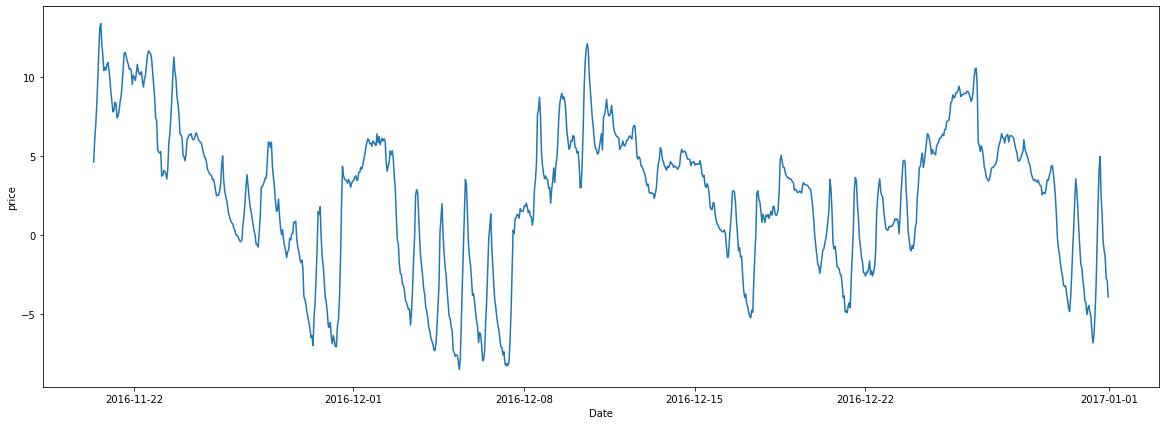

In [89]:
plt.figure(figsize=(20, 7))

plt.plot(date_time[-1000:], temp_arr[-1000:])
plt.xlabel('Date')
plt.ylabel('price')
plt.show()


In [87]:
len(test_windows)

7007

In [94]:
model_0_preds.numpy()

array([-0.79282755, -0.86584044, -0.8567752 , ..., -1.2541467 ,
       -1.444898  , -1.4239976 ], dtype=float32)

In [91]:
test_labels


array([[-0.82937587],
       [-0.83630831],
       [-0.82937587],
       ...,
       [-1.3701069 ],
       [-1.38628261],
       [-1.50644506]])

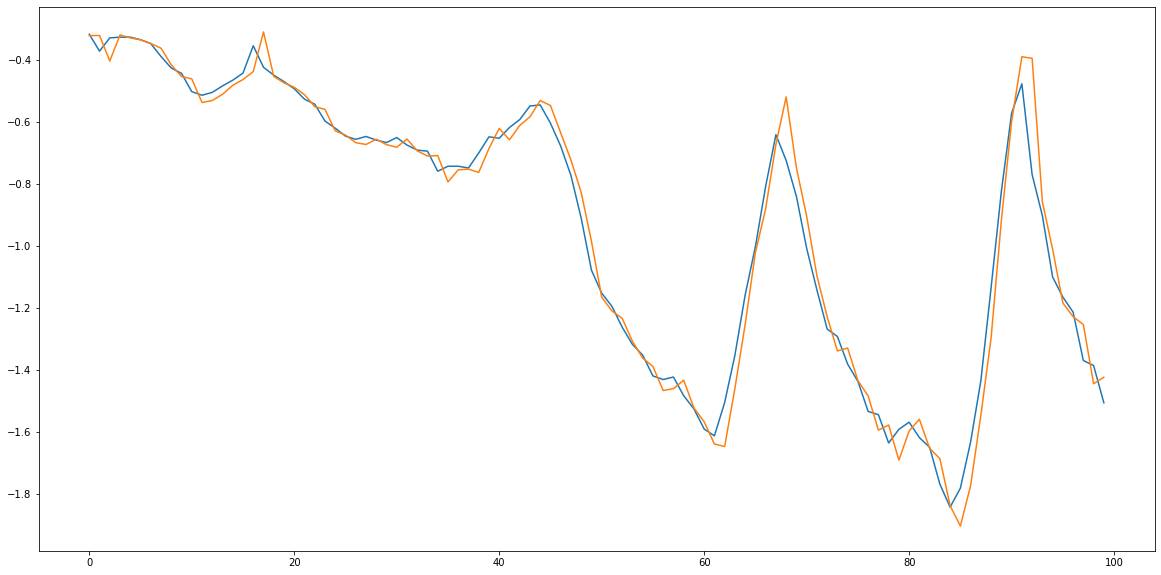

In [100]:
plt.figure(figsize=(20, 10))
plt.plot(test_labels[-100:])
plt.plot(model_0_preds[-100:])

In [101]:
test_labels[-3:]

array([[-1.3701069 ],
       [-1.38628261],
       [-1.50644506]])

In [102]:
test_df

,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),Wx,Wy,max Wx,max Wy,Day sin,Day cos,Year sin,Year cos
378491,1.599724,-0.728855,-0.846438,-0.480418,0.821124,-0.764821,-0.633744,-0.667960,-0.656453,-0.654069,1.089310,1.623820,1.106908,1.557556,1.016688,-1.224696,0.707179,1.262942,0.511342
378497,1.653958,-0.734632,-0.856754,-0.563604,0.615753,-0.767420,-0.700280,-0.613992,-0.720093,-0.719796,1.112016,1.704558,0.855454,1.888362,0.898892,-0.999946,1.000059,1.263298,0.510397
378503,1.684087,-0.768139,-0.892285,-0.593724,0.645954,-0.788214,-0.721666,-0.626446,-0.742555,-0.743270,1.153523,1.660785,1.082109,1.443980,0.911444,-0.707046,1.224794,1.263652,0.509452
378509,1.666010,-0.829376,-0.950739,-0.542091,0.990254,-0.822003,-0.683646,-0.717775,-0.705119,-0.703364,1.205528,1.043796,1.479713,1.060063,1.414679,-0.365957,1.366069,1.264006,0.508506
378515,1.658778,-0.836308,-0.957616,-0.550696,0.990254,-0.827201,-0.690775,-0.717775,-0.712606,-0.710407,1.211876,1.804237,1.284633,1.767462,1.197013,0.000077,1.414255,1.264359,0.507561
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420521,1.629854,-1.165600,-1.281981,-1.428459,-0.235937,-0.996148,-1.251577,-0.499831,-1.262910,-1.264390,1.555401,-0.129648,0.148238,-0.119794,0.175300,-1.348713,0.425346,-0.065547,1.428472
420527,1.535849,-1.214127,-1.322097,-1.640728,-0.580840,-1.019541,-1.356133,-0.443788,-1.363986,-1.365328,1.583967,-0.060615,-0.214379,-0.123420,-0.251059,-1.192686,0.759926,-0.064524,1.428464
420533,1.510540,-1.370107,-1.475683,-1.649333,-0.181573,-1.087119,-1.358509,-0.549647,-1.367729,-1.370023,1.734122,-0.033443,0.415894,-0.157093,0.487113,-0.955374,1.042725,-0.063501,1.428456
420539,1.445460,-1.386283,-1.487144,-1.685190,-0.217815,-1.094917,-1.375143,-0.545496,-1.382704,-1.384107,1.734366,0.155773,0.116774,0.133325,0.115670,-0.652949,1.254471,-0.062478,1.428447


In [103]:
df

,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),Wx,Wy,max Wx,max Wy,Day sin,Day cos,Year sin,Year cos
5,996.50,-8.05,265.38,-8.78,94.40,3.33,3.14,0.19,1.96,3.15,1307.86,-0.204862,-0.046168,-0.614587,-0.138503,0.258819,0.965926,0.010049,0.999950
11,996.62,-8.88,264.54,-9.77,93.20,3.12,2.90,0.21,1.81,2.91,1312.25,-0.245971,-0.044701,-0.619848,-0.112645,0.500000,0.866025,0.010766,0.999942
17,996.84,-8.81,264.59,-9.66,93.50,3.13,2.93,0.20,1.83,2.94,1312.18,-0.175527,0.039879,-0.614344,0.139576,0.707107,0.707107,0.011483,0.999934
23,996.99,-9.05,264.34,-10.02,92.60,3.07,2.85,0.23,1.78,2.85,1313.61,-0.050000,-0.086603,-0.190000,-0.329090,0.866025,0.500000,0.012199,0.999926
29,997.46,-9.63,263.72,-10.65,92.20,2.94,2.71,0.23,1.69,2.71,1317.19,-0.368202,0.156292,-0.810044,0.343843,0.965926,0.258819,0.012916,0.999917
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420521,1002.18,-0.98,272.01,-5.36,72.00,5.69,4.09,1.59,2.54,4.08,1280.70,-0.855154,-0.160038,-1.336792,-0.250174,-0.953717,0.300706,0.006900,0.999976
420527,1001.40,-1.40,271.66,-6.84,66.29,5.51,3.65,1.86,2.27,3.65,1281.87,-0.716196,-0.726267,-1.348134,-1.367090,-0.843391,0.537300,0.007617,0.999971
420533,1001.19,-2.75,270.32,-6.90,72.90,4.99,3.64,1.35,2.26,3.63,1288.02,-0.661501,0.257908,-1.453438,0.566672,-0.675590,0.737277,0.008334,0.999965
420539,1000.65,-2.89,270.22,-7.15,72.30,4.93,3.57,1.37,2.22,3.57,1288.03,-0.280621,-0.209169,-0.545207,-0.406385,-0.461749,0.887011,0.009050,0.999959


In [104]:
date_time

5        2009-01-01 01:00:00
11       2009-01-01 02:00:00
17       2009-01-01 03:00:00
23       2009-01-01 04:00:00
29       2009-01-01 05:00:00
                 ...        
420521   2016-12-31 19:10:00
420527   2016-12-31 20:10:00
420533   2016-12-31 21:10:00
420539   2016-12-31 22:10:00
420545   2016-12-31 23:10:00
Name: Date Time, Length: 70091, dtype: datetime64[ns]

In [105]:
test_time = date_time[int(n*0.9):]

In [106]:
test_time

378491   2016-03-11 20:00:00
378497   2016-03-11 21:00:00
378503   2016-03-11 22:00:00
378509   2016-03-11 23:00:00
378515   2016-03-12 00:00:00
                 ...        
420521   2016-12-31 19:10:00
420527   2016-12-31 20:10:00
420533   2016-12-31 21:10:00
420539   2016-12-31 22:10:00
420545   2016-12-31 23:10:00
Name: Date Time, Length: 7010, dtype: datetime64[ns]

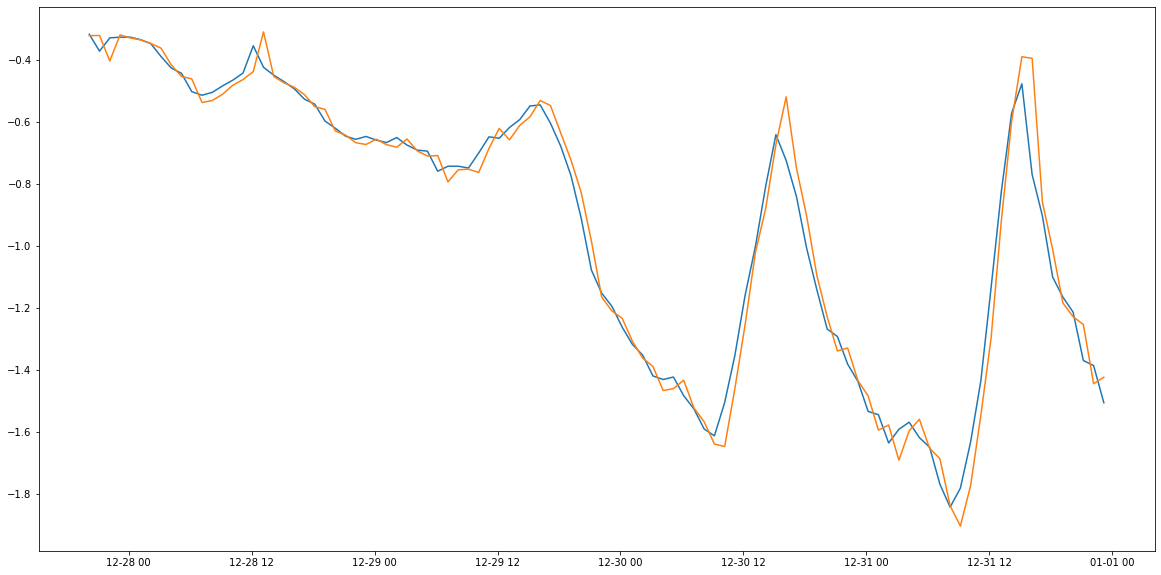

In [110]:
plt.figure(figsize=(20, 10))
plt.plot(test_time[-100:], test_labels[-100:])
plt.plot(test_time[-100:], model_0_preds[-100:])

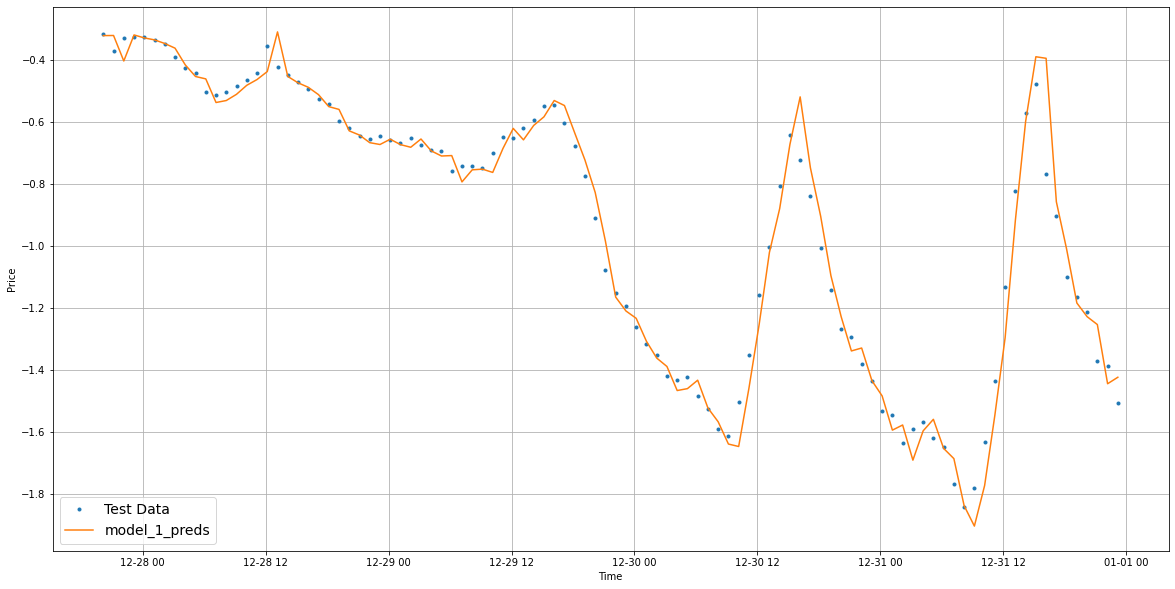

In [111]:
plt.figure(figsize=(20, 10))
# Account for the test_window offset and index into test_labels to ensure correct plotting
plot_time_series(timesteps=date_time[-len(test_windows):], 
                 values=test_labels[:, 0], 
                 start=-100, 
                 label="Test Data")

plot_time_series(timesteps=date_time[-len(test_windows):],
                 values=model_0_preds,
                 start=-100, 
                 format="-",
                 label="model_1_preds")

#Use built in tf methods

In [127]:

length = temp_arr.size-3
ds = tf.keras.utils.timeseries_dataset_from_array(data=temp_arr,
                                                  targets=temp_arr[-length:],
                                                  sequence_stride=1,
                                                  shuffle=False,
                                                  sequence_length=3,
                                                  batch_size=32)
ds

<BatchDataset element_spec=(TensorSpec(shape=(None, None), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>

In [128]:
ds1 = ds.take(2)

for window in ds1:
  print(window)

(<tf.Tensor: shape=(32, 3), dtype=float64, numpy=
array([[-8.05, -8.88, -8.81],
       [-8.88, -8.81, -9.05],
       [-8.81, -9.05, -9.63],
       [-9.05, -9.63, -9.67],
       [-9.63, -9.67, -9.17],
       [-9.67, -9.17, -8.1 ],
       [-9.17, -8.1 , -7.66],
       [-8.1 , -7.66, -7.04],
       [-7.66, -7.04, -7.41],
       [-7.04, -7.41, -6.87],
       [-7.41, -6.87, -5.89],
       [-6.87, -5.89, -5.94],
       [-5.89, -5.94, -5.69],
       [-5.94, -5.69, -5.4 ],
       [-5.69, -5.4 , -5.37],
       [-5.4 , -5.37, -5.25],
       [-5.37, -5.25, -5.11],
       [-5.25, -5.11, -4.9 ],
       [-5.11, -4.9 , -4.8 ],
       [-4.9 , -4.8 , -4.5 ],
       [-4.8 , -4.5 , -4.47],
       [-4.5 , -4.47, -4.54],
       [-4.47, -4.54, -4.44],
       [-4.54, -4.44, -4.29],
       [-4.44, -4.29, -4.45],
       [-4.29, -4.45, -4.58],
       [-4.45, -4.58, -4.96],
       [-4.58, -4.96, -4.43],
       [-4.96, -4.43, -4.28],
       [-4.43, -4.28, -4.33],
       [-4.28, -4.33, -4.13],
       [-4.33, -4.13

In [119]:
temp_arr

array([-8.05, -8.88, -8.81, ..., -2.75, -2.89, -3.93])

In [120]:
temp_train_arr

array([-1.98247323, -2.07837211, -2.07028426, ...,  0.74082386,
        0.71078325,  0.65301284])

In [121]:
test_labels

array([[-0.82937587],
       [-0.83630831],
       [-0.82937587],
       ...,
       [-1.3701069 ],
       [-1.38628261],
       [-1.50644506]])

#Create train, val & test tf.data.Datasets

###Train

In [131]:
WINDOW=3

train_target_slice = temp_train_arr.size-WINDOW
train_tfds = tf.keras.utils.timeseries_dataset_from_array(data=temp_train_arr,
                                                  targets=temp_train_arr[-train_target_slice:],
                                                  sequence_stride=1,
                                                  shuffle=False,
                                                  sequence_length=WINDOW,
                                                  batch_size=32)

###Val

In [132]:
val_target_slice = temp_val_arr.size-WINDOW
val_tfds = tf.keras.utils.timeseries_dataset_from_array(data=temp_val_arr,
                                                  targets=temp_val_arr[-val_target_slice:],
                                                  sequence_stride=1,
                                                  shuffle=False,
                                                  sequence_length=WINDOW,
                                                  batch_size=32)

In [133]:
test_target_slice = temp_test_arr.size-WINDOW
test_tfds = tf.keras.utils.timeseries_dataset_from_array(data=temp_test_arr,
                                                  targets=temp_test_arr[-test_target_slice:],
                                                  sequence_stride=1,
                                                  shuffle=False,
                                                  sequence_length=WINDOW,
                                                  batch_size=32)

In [135]:
AUTOTUNE = tf.data.AUTOTUNE

train_tfds = train_tfds.cache().prefetch(buffer_size=AUTOTUNE)
val_tfds = val_tfds.cache().prefetch(buffer_size=AUTOTUNE)
test_tfds = test_tfds.cache().prefetch(buffer_size=AUTOTUNE)

In [136]:
history_tfds = model_0.fit(train_tfds,
                      epochs=100,
                      verbose=1,
                      batch_size=128,
                      validation_data=val_tfds,
                      callbacks=[early_stopping])

Epoch 1/100
1534/1534 [==============================] - 14s 9ms/step - loss: 0.0642 - mae: 0.0642 - val_loss: 0.0706 - val_mae: 0.0706
Epoch 2/100
1534/1534 [==============================] - 7s 5ms/step - loss: 0.0637 - mae: 0.0637 - val_loss: 0.0733 - val_mae: 0.0733
Epoch 3/100
1534/1534 [==============================] - 7s 4ms/step - loss: 0.0641 - mae: 0.0641 - val_loss: 0.0718 - val_mae: 0.0718
Epoch 4/100
1534/1534 [==============================] - 7s 4ms/step - loss: 0.0639 - mae: 0.0639 - val_loss: 0.0718 - val_mae: 0.0718
Epoch 5/100
1534/1534 [==============================] - 7s 4ms/step - loss: 0.0639 - mae: 0.0639 - val_loss: 0.0719 - val_mae: 0.0719
Epoch 6/100
1534/1534 [==============================] - 7s 4ms/step - loss: 0.0637 - mae: 0.0637 - val_loss: 0.0758 - val_mae: 0.0758


In [137]:
results_tfds_test_0= model_0.evaluate(test_tfds)

219/219 [==============================] - 2s 7ms/step - loss: 0.0723 - mae: 0.0723


In [138]:
results_tfds_test_0

[0.0723312497138977, 0.0723312497138977]

In [139]:
results_tfds_test_1 = model_0.predict(test_tfds)

<tf.Tensor: shape=(1, 7007), dtype=bool, numpy=array([[False, False, False, ..., False, False, False]])>

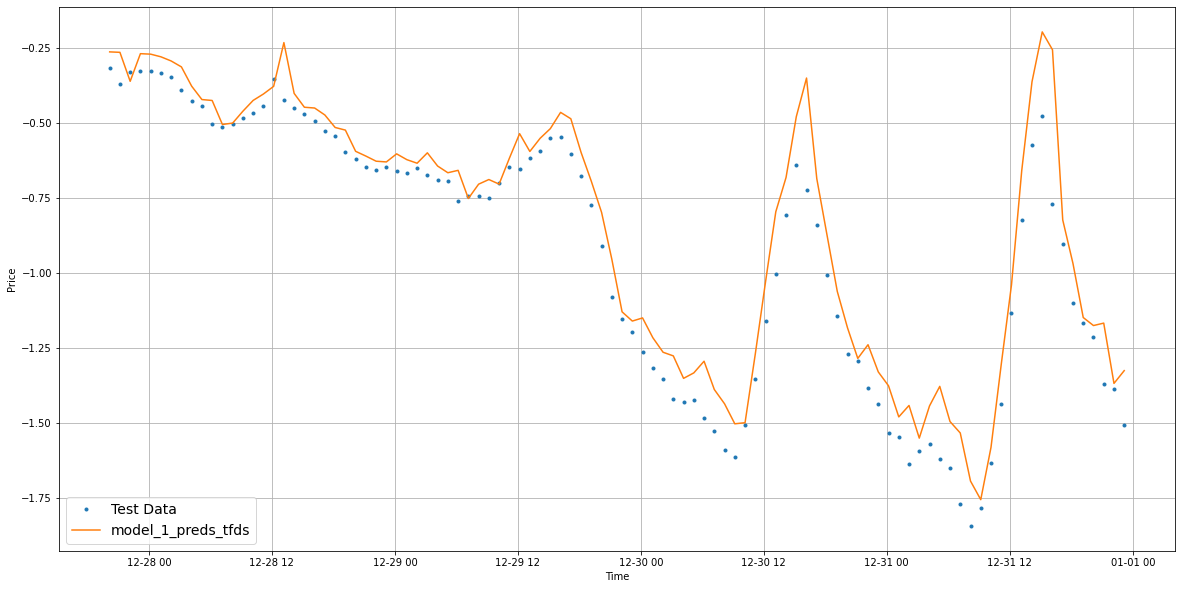

In [148]:
plt.figure(figsize=(20, 10))
# Account for the test_window offset and index into test_labels to ensure correct plotting
plot_time_series(timesteps=date_time[-len(results_tfds_test_1):], 
                 values=test_labels[:, 0], 
                 start=-100, 
                 label="Test Data")

plot_time_series(timesteps=date_time[-len(results_tfds_test_1):],
                 values=results_tfds_test_1,
                 start=-100, 
                 format="-",
                 label="model_1_preds_tfds")

In [157]:
# Plot the validation and training data separately
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """ 
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  # accuracy = history.history['accuracy']
  # val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # # Plot accuracy
  # plt.figure()
  # # plt.plot(epochs, accuracy, label='training_accuracy')
  # # plt.plot(epochs, val_accuracy, label='val_accuracy')
  # plt.title('Accuracy')
  # plt.xlabel('Epochs')
  # plt.legend();

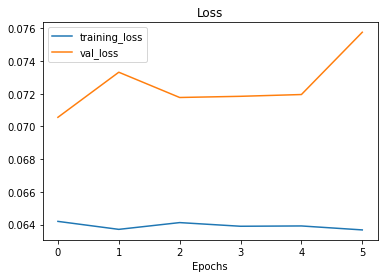

In [158]:
plot_loss_curves(history_tfds)

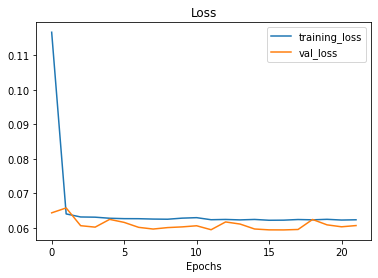

In [159]:
plot_loss_curves(history)

In [160]:
naive_forecast = temp_train_arr[:-1]
naive_forecast[:10], naive_forecast[-10:] # View frist 10 and last 10

(array([-1.98247323, -2.07837211, -2.07028426, -2.09801405, -2.16502773,
        -2.16964936, -2.11187895, -1.98825027, -1.93741231, -1.86577701]),
 array([1.58196102, 1.69403561, 1.66168418, 1.05509488, 0.97999335,
        0.93724325, 0.90489182, 0.87947284, 0.74082386, 0.71078325]))

In [162]:
naive_results = evaluate_preds(y_true=temp_train_arr[1:],
                               y_pred=naive_forecast)
naive_results

{'mae': 0.08293154,
 'mape': 64.16384,
 'mase': 1.0000031,
 'mse': 0.013971615,
 'rmse': 0.11820158}